In [1]:
import torch
import client
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

In [3]:
dataset_train = datasets.CIFAR10('./datasets/cifar10', train = True,download=False, transform=transforms.ToTensor())

In [21]:
labels = [y for _, y in dataset_train]
ids = [i for i in range(len(dataset_train))]

In [ ]:
import random
couples = [(id, label) for id, label in zip(labels,ids)]
couples.sort()
print(couples)
ids = [id for _, id in couples]


In [1]:
import os

In [ ]:
for r, dirs, files in os.walk('sd'):
    for file in files:
        if file.endswith(".png") and file.stat:
            name = os.path.join(r,file)
            

In [4]:
datasets.SVHN('./datasets/svhn', split = 'train', transform=transforms.ToTensor(), download = True)

  0%|          | 0/182040794 [00:00<?, ?it/s]

Dataset SVHN
    Number of datapoints: 73257
    Root location: ./datasets/svhn
    Split: train
    StandardTransform
Transform: ToTensor()

In [5]:
datasets.SVHN('./datasets/svhn', split = 'test', transform=transforms.ToTensor(), download = True)

  0%|          | 0/64275384 [00:00<?, ?it/s]

Dataset SVHN
    Number of datapoints: 26032
    Root location: ./datasets/svhn
    Split: test
    StandardTransform
Transform: ToTensor()

In [50]:
transform = transforms.Compose([transforms.Resize(32),transforms.Grayscale(
    num_output_channels=3)])
data1 = datasets.MNIST('./datasets/mnist', train=True,
                        transform=transform, download=False)

In [51]:
len(data1)


60000

In [52]:
data2 = datasets.SVHN(
                './datasets/svhn', split='train', download=False)

In [53]:
len(data2)

73257

In [66]:


class mixed_dataset(Dataset):
    def __init__(self, *datasets):
        self.len = 0
        print(datasets)
        for data in datasets:
            self.len += len(data)

        self.datasets = datasets

    def __len__(self):
        return self.len

    def __getitem__(self, k):
        datasets = self.datasets

        for data in datasets:
            if k >= len(data):
                k -= len(data)
            else:
                x = data[k][0]
                y = data[k][1]
                break

        return x, y

In [71]:
data_mixed = []
data_list = ['mnist', 'svhn']

if 'cifar10' in data_list:
    data_mixed.append(datasets.CIFAR10(
        './datasets/cifar10', train=True, download=False))

if 'svhn' in data_list:
    data_mixed.append(datasets.SVHN(
        './datasets/svhn', split='train',  download=False))

if 'mnist' in data_list:
    transform = transforms.Compose([transforms.Resize(32), transforms.Grayscale(
        num_output_channels=3)])
    data_mixed.append(datasets.MNIST(
        './datasets/mnist', train=True, transform=transform, download=False))


else:
    raise 'No dataset'

dataset_train = mixed_dataset(*data_mixed)

(Dataset SVHN
    Number of datapoints: 73257
    Root location: ./datasets/svhn
    Split: train, Dataset MNIST
    Number of datapoints: 60000
    Root location: ./datasets/mnist
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=32, interpolation=bilinear, max_size=None, antialias=None)
               Grayscale(num_output_channels=3)
           ))


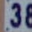

In [76]:
dataset_train[32569][0]